In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
files = [file for file in os.listdir('MSB_0_1/') if 'results' in file and len(file.split('_')) == 3]

In [3]:
with open('MSB_0_1/'+'paramgrid_asymmetry_stepwise.txt','rb') as f:
    param_grid = pickle.load(f)

In [4]:
def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 2:
            p += pop_vec[g]
    return(p)

def transient_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def transient_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def mutator_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 2:
            p += pop_vec[g]
    return(p)

def pS_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + baseline_single_mut(genotypes_names, pop_vec) + transient_single_mut(genotypes_names, pop_vec))

def pM_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + mutator_nomut(genotypes_names, pop_vec))

def transient_proportion(genotypes_names, pop_vec):
    return(transient_single_mut(genotypes_names, pop_vec) + transient_nomut(genotypes_names, pop_vec))

def pR_proportion(genotypes_names, pop_vec):
    return(baseline_single_mut(genotypes_names, pop_vec)/baseline_nomut(genotypes_names, pop_vec))

def association(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec)/pS_proportion(genotypes_names, pop_vec))

In [5]:
genotype_names_3 = []
for i in range(3):
    for j in range(3):
        for k in range(5):
            genotype_names_3.append((i,j,k))
            
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [6]:
noise_labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','0.95']
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(99)
which_ticks = [convert_logspace(val, switching_rates, range_axis) for val in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.95]]

In [7]:
ind_pos = {(0.01,10):(0,0), (0.01,100):(1,0),
           (0.03,10):(0,1), (0.03,100):(1,1),
           (0.1,10):(0,2), (0.1,100):(1,2)}

In [8]:
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [9]:
all_results = {}

for p in range(36):

    heatmap_m0 = np.zeros((100,100))
    heatmap_m1 = np.zeros((100,100))
    heatmap_M0 = np.zeros((100,100))
    heatmap_M1 = np.zeros((100,100))
    heatmap_t0 = np.zeros((100,100))
    heatmap_t1 = np.zeros((100,100))
    
    heatmap_pM = np.zeros((100,100))
    heatmap_sum_pM = np.zeros((100,100))
    heatmap_transient = np.zeros((100,100))
    
    heatmap_pS = np.zeros((100,100))
    
    heatmap_association_pM = np.zeros((100,100))
    heatmap_association_t1 = np.zeros((100,100))
    heatmap_association_sum = np.zeros((100,100))
    heatmap_adaptation = np.zeros((100,100))

    for i in range(100):
        
        with open('MSB_0_1/results_'+str(p)+'_'+str(i)+'.txt', 'rb') as f:
            file_result = pickle.load(f)
            for j in range(100):
                
                result_m0 = baseline_nomut(genotype_names_3, file_result[j])
                result_m1 = baseline_single_mut(genotype_names_3, file_result[j])
                result_M0 = mutator_nomut(genotype_names_3, file_result[j])
                result_M1 = mutator_single_mut(genotype_names_3, file_result[j])
                result_t0 = transient_nomut(genotype_names_3, file_result[j])
                result_t1 = transient_single_mut(genotype_names_3, file_result[j])
                
                result_pM = pM_proportion(genotype_names_3, file_result[j])
                result_transient = transient_proportion(genotype_names_3, file_result[j])
                result_sum_pM = result_pM + result_transient
                
                result_pS = pS_proportion(genotype_names_3, file_result[j])
                
                result_association_pM = result_M1 - result_pM*result_pS
                result_association_t1 = result_t1 - result_transient*result_pS
                result_association_sum = (result_t1+result_M1) - (result_pM+result_transient)*result_pS
                
                result_adaptation = param_grid[p]['mu']*np.exp(-param_grid[p]['mu'])*result_m1 + param_grid[p]['tau']*param_grid[p]['mu']*np.exp(-param_grid[p]['tau']*param_grid[p]['mu'])*result_M1+0.5*param_grid[p]['tau']*param_grid[p]['mu']*np.exp(-0.5*param_grid[p]['tau']*param_grid[p]['mu'])*result_t1
                
                heatmap_m0[99-i,j] = result_m0
                heatmap_m1[99-i,j] = result_m1
                heatmap_M0[99-i,j] = result_M0                
                heatmap_M1[99-i,j] = result_M1
                heatmap_t0[99-i,j] = result_t0                
                heatmap_t1[99-i,j] = result_t1
                
                heatmap_pM[99-i,j] = result_pM
                heatmap_transient[99-i,j] = result_transient
                heatmap_sum_pM[99-i,j] = result_sum_pM
                
                heatmap_pS[99-i,j] = result_pS
                
                heatmap_association_pM[99-i,j] = result_association_pM
                heatmap_association_t1[99-i,j] = result_association_t1
                heatmap_association_sum[99-i,j] = result_association_sum
                
                heatmap_adaptation[99-i,j] = result_adaptation
                

    all_results[(param_grid[p]['mu'], param_grid[p]['s'], param_grid[p]['tau'], param_grid[p]['delta'])] = {'m1':heatmap_m1, 
                                                                                    'm0': heatmap_m0, 
                                                                                    'M0': heatmap_M0, 
                                                                                    'M1': heatmap_M1, 
                                                                                    't0': heatmap_t0,
                                                                                    't1': heatmap_t1,
                                                                                    'pS': heatmap_pS, 
                                                                                    'pM': heatmap_pM,
                                                                                    'transient':heatmap_transient,
                                                                                    'sum_transient_pM':heatmap_sum_pM,
                                                                                    'adaptation': heatmap_adaptation, 
                                                                                    'heatmap_association_pM': heatmap_association_pM,
                                                                                    'heatmap_association_t1': heatmap_association_t1,
                                                                                    'heatmap_association_sum': heatmap_association_sum}

In [10]:
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(100)

In [11]:
set_paramsets_s = [(14,15,20,21),
                   (2,3,8,9),
                   (26,27,32,33)]

params = list(all_results.keys())

In [12]:
exponents_notation = ['x$10^{-9}$', 'x$10^{-8}$', 'x$10^{-9}$', 'x$10^{-7}$']

<ipython-input-13-02738510ebff>:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_bad(color='lightgrey')
<ipython-input-13-02738510ebff>:14: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  cmap.set_bad(color='lightgrey')
<ipython-input-13-02738510ebff>:20: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = 

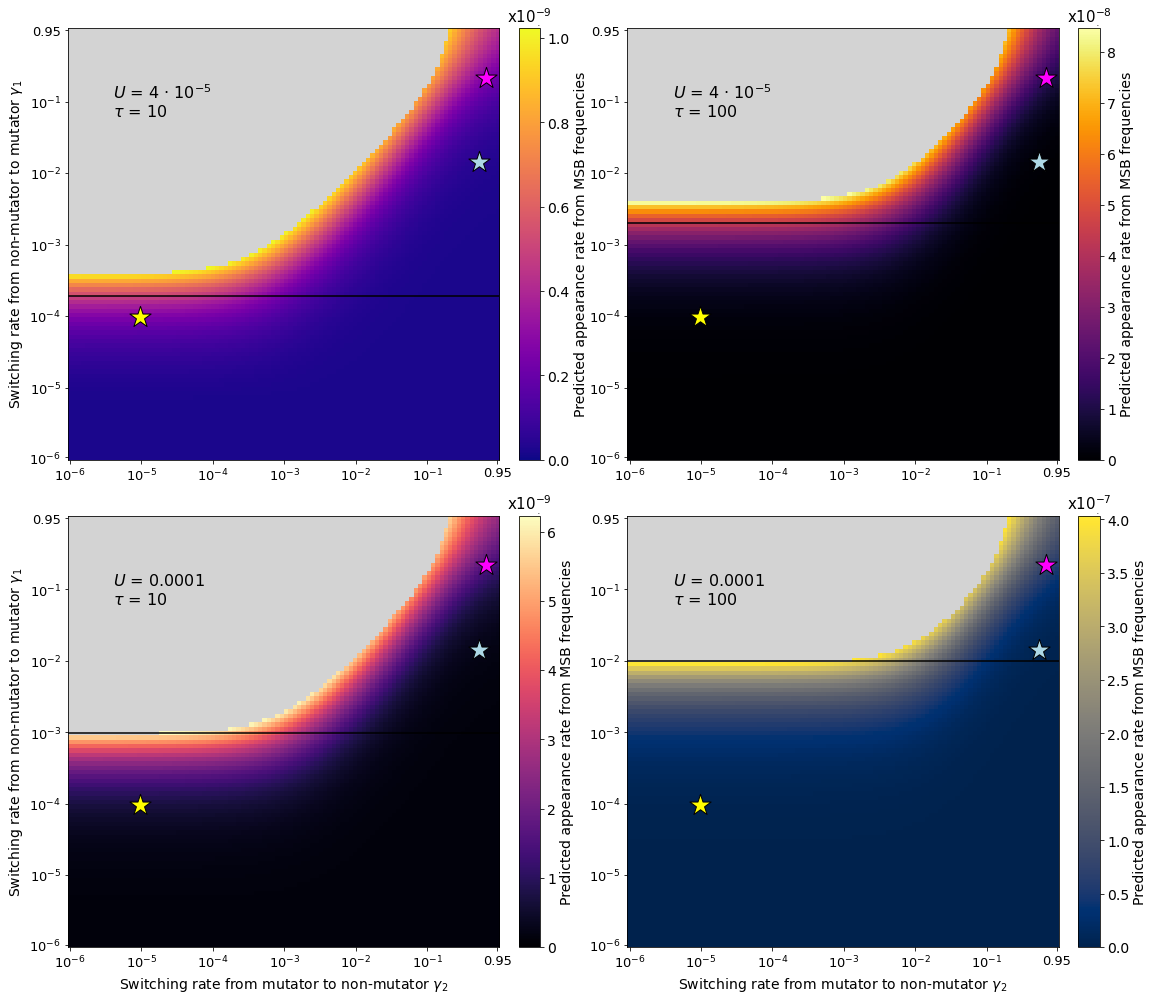

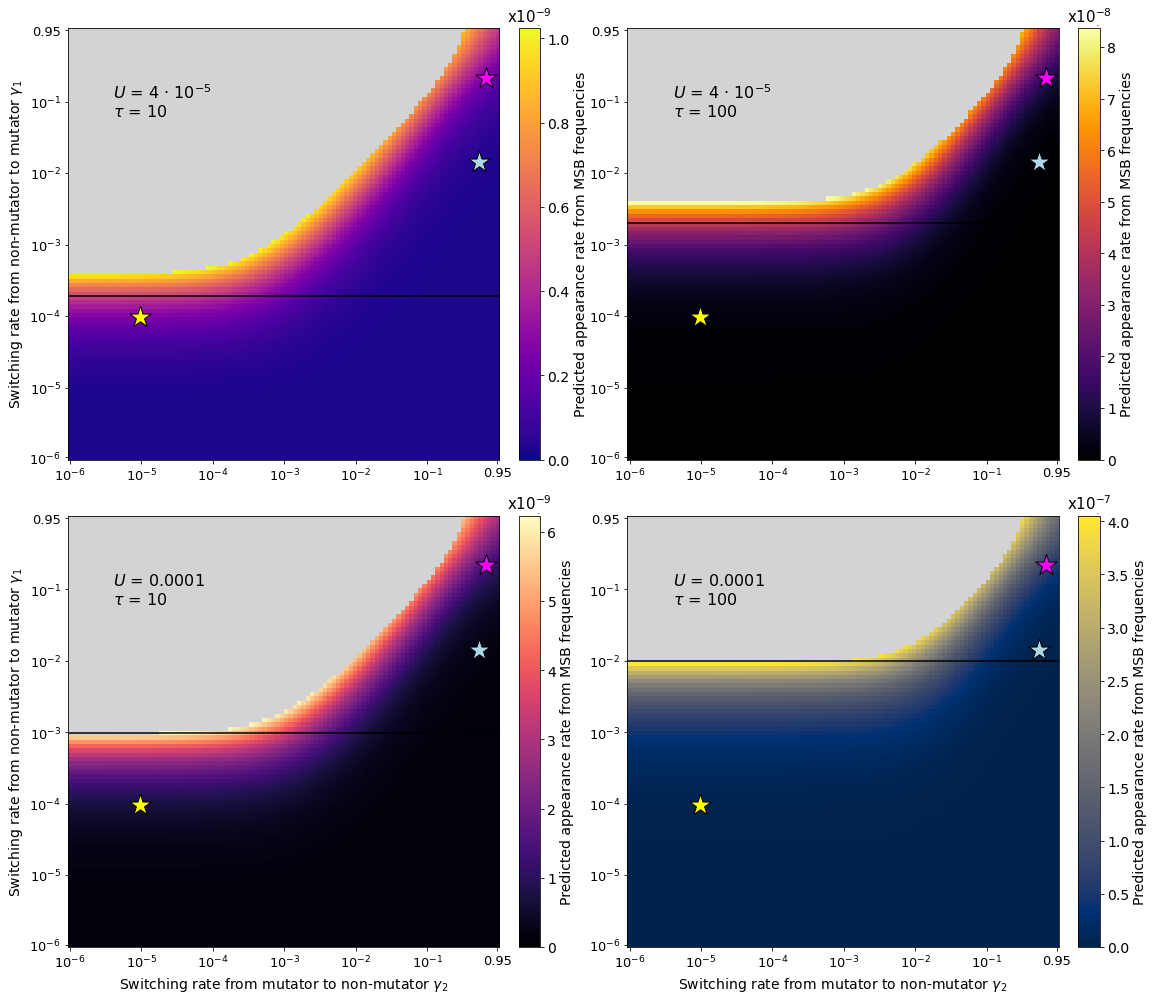

In [13]:
for paramset in [0,2]:

    fig, ax = plt.subplots(2,2, figsize = (16,14))
    
    masked_array_0 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][0]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][0]]]['adaptation'])
    cmap = matplotlib.cm.plasma
    cmap.set_bad(color='lightgrey')
    im0 = ax[0,0].imshow(masked_array_0, vmin = 0, cmap = 'plasma')
    
    masked_array_1 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][1]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][1]]]['adaptation'])
    cmap = matplotlib.cm.inferno
    cmap.set_bad(color='lightgrey')
    im1 = ax[0,1].imshow(masked_array_1, vmin = 0, cmap = 'inferno')    
    
    masked_array_2 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][2]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][2]]]['adaptation'])
    cmap = matplotlib.cm.magma
    cmap.set_bad(color='lightgrey')
    im2 = ax[1,0].imshow(masked_array_2, vmin = 0, cmap = 'magma')  

    masked_array_3 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][3]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][3]]]['adaptation'])
    cmap = matplotlib.cm.cividis
    cmap.set_bad(color='lightgrey')
    im3 = ax[1,1].imshow(masked_array_3, vmin = 0, cmap = 'cividis')
    
    cbar0 = plt.colorbar(im0, ax=ax[0,0], fraction=0.046, pad=0.04)
    cbar1 = plt.colorbar(im1, ax=ax[0,1], fraction=0.046, pad=0.04)
    cbar2 = plt.colorbar(im2, ax=ax[1,0], fraction=0.046, pad=0.04)
    cbar3 = plt.colorbar(im3, ax=ax[1,1], fraction=0.046, pad=0.04)
    
    ax[0,0].axhline(100-convert_logspace(2e-4, switching_rates, range_axis), c = 'k')
    ax[0,1].axhline(100-convert_logspace(2e-3, switching_rates, range_axis), c = 'k')
    #ax[1,0].axhline(100-convert_logspace(1e-3*0.5, switching_rates, range_axis), c = 'k')
    #ax[1,1].axhline(100-convert_logspace(1e-2*0.5, switching_rates, range_axis), c = 'k')
    
    ax[1,0].axhline(100-convert_logspace(1e-3, switching_rates, range_axis), c = 'k')
    ax[1,1].axhline(100-convert_logspace(1e-2, switching_rates, range_axis), c = 'k')
    
    for cbar in [cbar0, cbar1, cbar2, cbar3]:
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('Predicted appearance rate from MSB frequencies', fontsize = 14)
        cbar.ax.yaxis.offsetText.set(size=14)
        cbar.formatter.set_powerlimits((0, 0))
        cbar.ax.yaxis.offsetText.set(size=0)
        cbar.ax.set_title(exponents_notation[[cbar0, cbar1, cbar2, cbar3].index(cbar)], fontsize = 15)

    ax[0,0].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 10', fontsize = 16, c = 'black')
    ax[0,1].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 100', fontsize = 16, c = 'black')
    ax[1,0].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 16, c = 'black')
    ax[1,1].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 100', fontsize = 16, c = 'black')

    for i in range(2):
        ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 14)
        ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 14)
        for j in range(2):
            ax[i,j].set_xticks(which_ticks)
            ax[i,j].set_xticklabels(noise_labels, fontsize = 13)
            ax[i,j].set_yticks(which_ticks)
            ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 13)
            ax[i,j].scatter(convert_logspace(1e-5, switching_rates, range_axis)-0.5,
                            100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 500, edgecolor = 'k')
            ax[i,j].scatter(convert_logspace(0.5, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 500, edgecolor = 'k')
            ax[i,j].scatter(convert_logspace(0.63, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s= 500, edgecolor = 'k')

    plt.tight_layout()
    
    output_folder = 'figures/adaptation/'
    plt.savefig(output_folder+'adaptation_'+str(paramset)+'_range_0_1_JAN20.jpg', dpi = 600, bbox_inches = 'tight')
    plt.show()